# Sea Level Predictor

You will analyze a dataset of the global average sea level change since 1880. You will use the data to predict the sea level change through year 2050.

Use the data to complete the following tasks:

    1. Use Pandas to import the data from epa-sea-level.csv.

    2. Use matplotlib to create a scatter plot using the Year column as the x-axis and the CSIRO Adjusted Sea Level column as the y-axix.

    3. Use the linregress function from scipy.stats to get the slope and y-intercept of the line of best fit. Plot the line of best fit over the top of the scatter plot. Make the line go through the year 2050 to predict the sea level rise in 2050.

    4. Plot a new line of best fit just using the data from year 2000 through the most recent year in the dataset. Make the line also go through the year 2050 to predict the sea level rise in 2050 if the rate of rise continues as it has since the year 2000.

    5. The x label should be Year, the y label should be Sea Level (inches), and the title should be Rise in Sea Level.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import numpy as np

def draw_plot():
    # Read data from file
    df = pd.read_csv('epa-sea-level.csv')

    # Create scatter plot
    # Year column as the x-axis and the CSIRO Adjusted Sea Level column as the y-axix
    plt.subplots(figsize=(12, 6), dpi=100)
    plt.scatter(y="CSIRO Adjusted Sea Level", x="Year", data=df)
    
    # Linear model : Y = A + B * X 
    # A >> Intercept
    # B >> Slope
    # X >> Independent variable
    # Linear regression : Find the relatioship between two variable and find the best line fit line 
    # scipy.stats.linregress method is used to calculate the parameters 
    # that establish a linear relationship between two sets of variables using the least-squares method.
    
    # Create first line of best fit
    linear_regression1 = linregress(df['Year'], df['CSIRO Adjusted Sea Level'])
    
    intercept1 = linear_regression1.intercept
    slope1 = linear_regression1.slope

    # Make the line go through the year 2050 to predict the sea level rise in 2050
    x_input1 = np.arange(df['Year'].min(), 2050)
    
    # build the model
    model = lambda s, x, i: (s * x + i)
    
    y_hat1 = model(slope1,  x_input1, intercept1)
    plt.plot(x_input1, y_hat1, c='g')

    # Create second line of best fit
    df_greater_than_2000 = df[df['Year'] >= 2000]
    linear_regression2 = linregress(df_greater_than_2000["Year"], df_greater_than_2000['CSIRO Adjusted Sea Level'])
    intercept2 = linear_regression2.intercept
    slope2 = linear_regression2.slope
    
    x_input2 = np.arange(2000, 2050)
    y_hat2 = model(slope2,  x_input2, intercept2)
    plt.plot(x_input2, y_hat2, c='orange')
    
    # Add labels and title
    plt.xlabel('Year')
    plt.ylabel('Sea Level (inches)')
    plt.title('Rise in Sea Level')
    
    # Save plot and return data for testing (DO NOT MODIFY)
    plt.savefig('sea_level_plot.png')
    return plt.gca()

<AxesSubplot:title={'center':'Rise in Sea Level'}, xlabel='Year', ylabel='Sea Level (inches)'>

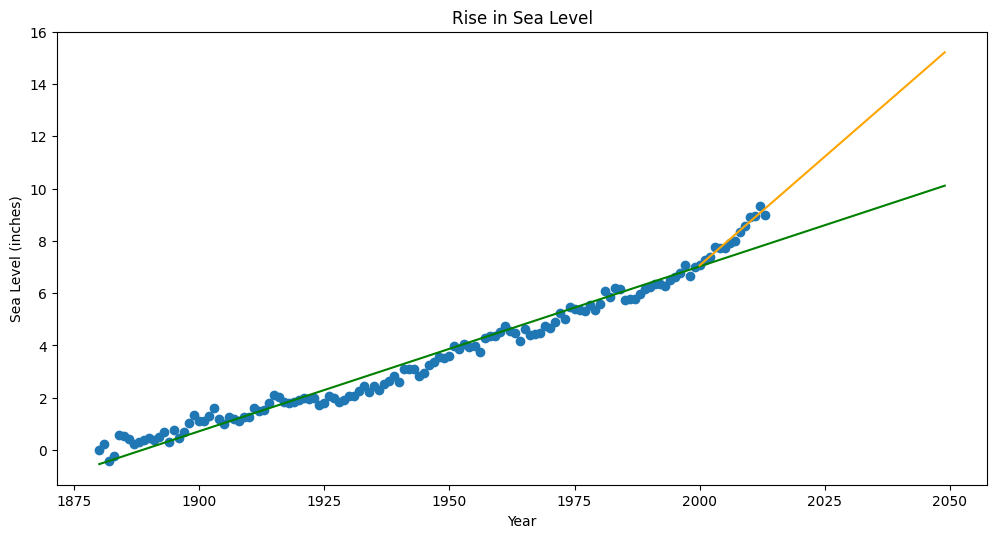

In [2]:
draw_plot()